%
\section{Classification Dataset: Kaggle Congressional Voting (\href{https://www.kaggle.com/c/184702-tu-ml-ss-21-congressional-voting/overview}{link to dataset})}
The Congressional Voting dataset is used for classification, it is a prediction on the party (republican or democrat) for politicians of the congress. It consists of 218 samples and 17 attributes where 15 attributes are given as string values (but corresponding to booleans) and 1 further as numerical value, the id of the row, which is not relevant so we drop it during the preprocessing step. The label is an ordinal value, "democrat" or "republican", and during the preprocessing step we transform it to respectively 0 and 1 value, and we replace "y" and "n" by 1 and 0. Hence, we have now only binary values. The description of the training dataset is the following {insert figure}.
We can see that there are some missing values, and we have the repartition of missing values among samples with the following table {insert table}. We can notice that the feature "export-administration-act-south-africa" is the most incomplete one, with 23% missing values, the other features having less than 11% missing values.
We decide to delete the samples with too many missing values (4 or more) because they are a few (8/218, less than 4%) and we suppose that it is not a great loss of data and it could be dangerous to keep too incomplete data because we fill every missing value randomly with 1 or 0 during the preprocessing step. When we tested with and without deleting the missing values, we We tried to impute them with a multivariate feature imputation, but the results were not improved.

We have to notice about this dataset that the false negatives and false positives show no theoritical difference: we do not have to privilege one over the other. So the performance by class should be barely the same. What is more, we can see that the training dataset is inbalanced, so we will use balanced indicators (such as balanced accuracy and f1 score), and make sure that our precision and recall are close.

In [430]:
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [431]:
training = pd.read_csv("./CongressionalVotingID.shuf.lrn.csv")
thres = 14
imputation = False

In [432]:
#preprocessing

#we drop the ID column which is not relevant
training_init = training.copy()
training.drop('ID', axis=1, inplace=True)

#we transform yes in 1 and no in 0, we convert "unknown" in NaN value and republican in 1 and democrat in 0, thus we have 
#only binary values
training = training.applymap(lambda x : 1 if x == "y" else (0 if x == "n" else (np.nan if x == "unknown" else (1 if x == "republican" else 0))))
training

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0
4,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
214,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
215,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
216,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [433]:
training.describe()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,218.000000,211.000000,194.000000,209.000000,211.000000,212.000000,213.000000,211.000000,213.000000,209.000000,216.000000,206.000000,203.000000,206.000000,210.000000,199.000000,168.000000
mean,0.366972,0.459716,0.541237,0.598086,0.407583,0.504717,0.629108,0.559242,0.591549,0.511962,0.527778,0.398058,0.369458,0.529126,0.595238,0.437186,0.845238
std,0.483088,0.499560,0.499586,0.491462,0.492553,0.501161,0.484182,0.497659,0.492705,0.501057,0.500387,0.490690,0.483851,0.500367,0.492019,0.497290,0.362759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [434]:
# count how many rows have 'x' missing values
m = training.copy()
n = m.isna().sum(axis=1)
n.name = "missing values in row"
d = n.to_frame()
d["number of rows"] = training_init["ID"]
d.groupby("missing values in row").count()

,number of rows
missing values in row,
0,118
1,61
2,21
3,10
4,1
5,2
6,2
9,1
14,1


In [435]:
#only rows with at least 14 known values
#training = training.dropna(axis=0, thresh=thres, subset=None, inplace=False)
# imputation
imp = IterativeImputer(max_iter=10, random_state=0)
if (imputation) :
    t = training.drop('class', axis=1)
    # we use multivariate feature imputation
    imp.fit(t)
    array = np.round(imp.transform(t))
    t = pd.DataFrame(array, columns = t.columns)
    t.index = training.index
    t['class'] = training['class']
    training = t
else :
    #we transform unknown values in 1 or 0 randomly
    training = training.fillna(random.randint(0,1))
training

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
214,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
215,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
216,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [436]:
training.describe()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.366972,0.444954,0.481651,0.573394,0.394495,0.490826,0.614679,0.541284,0.577982,0.490826,0.522936,0.376147,0.344037,0.500000,0.573394,0.399083,0.651376
std,0.483088,0.498104,0.500813,0.495722,0.489867,0.501066,0.487791,0.499440,0.495018,0.501066,0.500623,0.485532,0.476146,0.501151,0.495722,0.490837,0.477631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [437]:
test = pd.read_csv("./CongressionalVotingID.shuf.tes.csv")
#preprocessing
test_init = test.copy()
test.drop('ID', axis=1, inplace=True)
test = test.applymap(lambda x : 1 if x == "y" else (0 if x == "n" else (np.nan if x == "unknown" else (1 if x == "republican" else 0))))
m = test.copy()
n = m.isna().sum(axis=1)
n.name = "missing values in row"
d = n.to_frame()
d["number of rows"] = test_init["ID"]
d = d.groupby("missing values in row").count()
test.dropna(axis=0, thresh=thres, subset=None, inplace=True)
if (imputation) :
    array = np.round(imp.transform(test))
    test = pd.DataFrame(array, columns = test.columns)
else :
    test = test.fillna(random.randint(0,1))
test.describe()


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.414747,0.414747,0.589862,0.419355,0.483871,0.635945,0.557604,0.534562,0.460829,0.470046,0.313364,0.442396,0.460829,0.566820,0.400922,0.585253
std,0.493817,0.493817,0.492996,0.494594,0.500895,0.482277,0.497819,0.499957,0.499616,0.500256,0.464934,0.497819,0.499616,0.496661,0.491218,0.493817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [438]:
d

,number of rows
missing values in row,
0,114
1,63
2,22
3,6
4,5
5,3
6,2
7,1
16,1


In [439]:
training.info()
votes_count=training["class"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 17 columns):
class                                     218 non-null int64
handicapped-infants                       218 non-null float64
water-project-cost-sharing                218 non-null float64
adoption-of-the-budget-resolution         218 non-null float64
physician-fee-freeze                      218 non-null float64
el-salvador-aid                           218 non-null float64
religious-groups-in-schools               218 non-null float64
anti-satellite-test-ban                   218 non-null float64
aid-to-nicaraguan-contras                 218 non-null float64
mx-missile                                218 non-null float64
immigration                               218 non-null float64
synfuels-crporation-cutback               218 non-null float64
education-spending                        218 non-null float64
superfund-right-to-sue                    218 non-null float64
crime          

[Text(0, 0, 'democrat'), Text(0, 0, 'republican')]

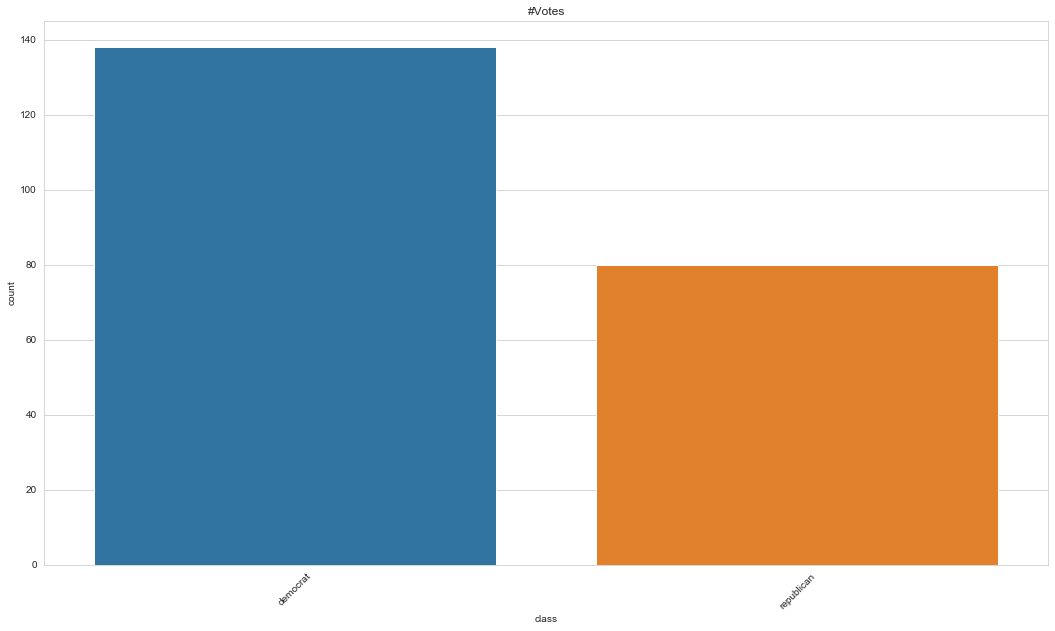

In [440]:
countplt, ax = plt.subplots(figsize = (18,10))
ax = sns.countplot(data=training, x='class')
ax.set_title("#Votes")
ax.set_xticklabels(["democrat","republican"], rotation=45)

In [441]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(training, test_size=0.2, random_state=42)
train = np.array(train_set)[:,1:]
train_target = np.array(train_set)[:,0]
test = np.array(test_set)[:,1:]
test_target = np.array(test_set)[:,0]

In [442]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , balanced_accuracy_score , precision_score , recall_score , f1_score
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

import seaborn as sns
sns.set_style('whitegrid')

### Variables for performance analysis ###

# abstract table
abstract = []

def create_perceptron(train_data, target, grid=[], **kwargs):
    if grid != []:
        clf = GridSearchCV(Perceptron(), grid, refit = True, verbose = 3,n_jobs=2)
    else:
        clf = Perceptron(**kwargs)
    clf.fit(train_data, target)
    return clf

def create_rnd_forrest(train_data, target, grid=[], **kwargs):
    if grid != []:
        clf = GridSearchCV(RandomForestClassifier(), grid, refit = True, verbose = 3,n_jobs=2)
    else:
        clf = RandomForestClassifier(**kwargs)
    clf.fit(train_data, target)
    return clf

def create_nb(train_data, target):
    clf =MultinomialNB()
    clf.fit(train_data , target)
    return clf
    
def evaluate_algo(algo, test_data, test_target, train_data, train_target):
    abstract.append([algo])
    print(algo)
    pred_test  = algo.predict(test_data)
    pred_train = algo.predict(train_data)
    
    # accuracy
    if (balance) :
        n1 = 100*balanced_accuracy_score(test_target, pred_test)
        n2 = 100*balanced_accuracy_score(train_target, pred_train)
        abstract[-1].append(["balanced accuracy",n1,n2])
        print("balanced accuracy of testset is {:.5} %".format(n1))
        print("balanced accuracy of trainset is {:.5} %".format(n2))
    else :
        n1 = 100*balanced_accuracy_score(test_target, pred_test)
        n2 = 100*balanced_accuracy_score(train_target, pred_train)
        abstract[-1].append(["accuracy",n1,n2])
        print("accuracy of testset is {:.5} %".format(n1))
        print("accuracy of trainset is {:.5} %".format(n2))
    
    # confusion matrix
    cmat = confusion_matrix(test_target, pred_test)
    cmat_train = confusion_matrix(train_target, pred_train)
    
    # report of metrics
    reportTest = classification_report(test_target, pred_test)
    reportTrain = classification_report(train_target, pred_train)
    abstract[-1].append(["report per class",reportTest,reportTrain])
    print("report per class of testset is ")
    print(str(reportTest))
    print("report per class of trainset is ")
    print(str(reportTrain))
    
    plt.figure(figsize = (6, 6))
    sns.heatmap(cmat, annot = True, 
                cmap = 'Paired', 
                cbar = False, 
                fmt="d", 
                xticklabels=['Democrat', 'Republican'], 
                yticklabels=['Democrat', 'Republican']);

In [443]:
param_grid = {'eta0': [0.1,0.2,0.3,0.4],  
              'early_stopping': [True, False],
              'max_iter':[10,20,30,100],
              'tol':[1e-4,1e-3,1e-2,1e-1]}  
ppn = create_perceptron(train, train_target, grid = param_grid)
print(ppn.best_params_) 

C:\Users\saeny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=2)]: Done 126 tasks      | elapsed:    4.5s


{'early_stopping': False, 'eta0': 0.3, 'max_iter': 20, 'tol': 0.0001}


[Parallel(n_jobs=2)]: Done 384 out of 384 | elapsed:    5.3s finished


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.3,
           fit_intercept=True, max_iter=20, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)
balanced accuracy of testset is 94.762 %
balanced accuracy of trainset is 88.636 %
report per class of testset is 
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        30
         1.0       0.93      0.93      0.93        14

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44

report per class of trainset is 
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       108
         1.0       1.00      0.77      0.87        66

    accuracy                           0.91       174
   macro avg       0.9

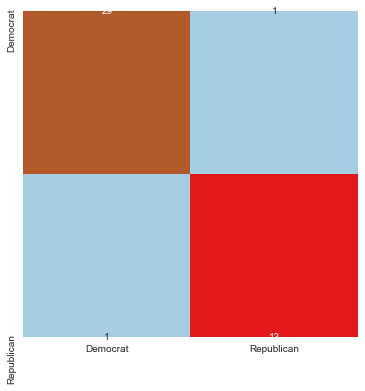

In [444]:
ppn = create_perceptron(train, train_target, **ppn.best_params_)

evaluate_algo(ppn, test, test_target, train, train_target)

In [445]:
param_grid = {'criterion': ["gini", "entropy"]}  
rndf = create_rnd_forrest(train, train_target, grid=param_grid)
print(rndf.best_params_) 

C:\Users\saeny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   6 | elapsed:    0.1s remaining:    0.1s


Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'criterion': 'entropy'}


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished
C:\Users\saeny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
balanced accuracy of testset is 100.0 %
balanced accuracy of trainset is 98.022 %
report per class of testset is 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

report per class of trainset is 
              precision    recall

C:\Users\saeny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


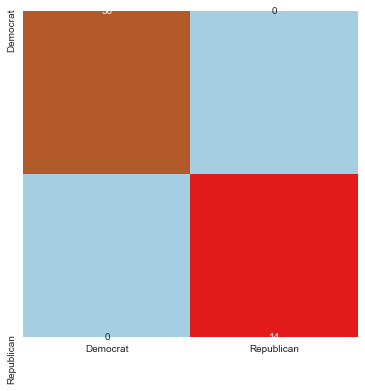

In [446]:
rndf = create_rnd_forrest(train, train_target, **rndf.best_params_)

evaluate_algo(rndf, test, test_target, train, train_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
balanced accuracy of testset is 93.333 %
balanced accuracy of trainset is 89.436 %
report per class of testset is 
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        30
         1.0       0.78      1.00      0.88        14

    accuracy                           0.91        44
   macro avg       0.89      0.93      0.90        44
weighted avg       0.93      0.91      0.91        44

report per class of trainset is 
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       108
         1.0       0.82      0.91      0.86        66

    accuracy                           0.89       174
   macro avg       0.88      0.89      0.89       174
weighted avg       0.90      0.89      0.89       174



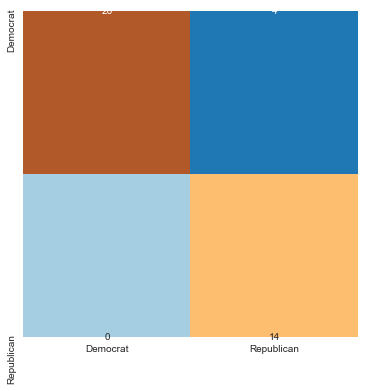

In [447]:
nb = create_nb(train, train_target)
evaluate_algo(nb, test, test_target, train, train_target)

In [448]:
for row in abstract :
    print("_________________________________________________________________________________________________")
    print("\n")
    print(row[0])
    for e in row[1:] :
        print(e[0] + " : " + str(e[1]) + " " + str(e[2]))
    print("\n")

_________________________________________________________________________________________________


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.3,
           fit_intercept=True, max_iter=20, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)
balanced accuracy : 94.76190476190476 88.63636363636364
report per class :               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        30
         1.0       0.93      0.93      0.93        14

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       108
         1.0       1.00      0.77      0.87        66

    accuracy                           0.91      

In [450]:
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.3,
           fit_intercept=True, max_iter=20, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)
balanced accuracy : 98.21428571428572 99.05660377358491
report per class :               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        28
         1.0       0.93      1.00      0.97        14

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.97        42
weighted avg       0.98      0.98      0.98        42
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       106
         1.0       0.97      1.00      0.98        62

    accuracy                           0.99       168
   macro avg       0.98      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168



_________________________________________________________________________________________________


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
balanced accuracy : 100.0 99.19354838709677
report per class :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       106
         1.0       1.00      0.98      0.99        62

    accuracy                           0.99       168
   macro avg       1.00      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168



_________________________________________________________________________________________________


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
balanced accuracy : 94.64285714285714 88.42057212416312
report per class :               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        28
         1.0       0.93      0.93      0.93        14

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42
               precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       106
         1.0       0.78      0.92      0.84        62

    accuracy                           0.88       168
   macro avg       0.86      0.88      0.87       168
weighted avg       0.89      0.88      0.88       168

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)